# Task: Alessia Leo Folliero

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from google.colab import files
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, classification_report

In [114]:
np.random.seed(120)

In [115]:
# Upload the file
uploaded = files.upload()

Saving data_science_internship_assignment_input_data.csv to data_science_internship_assignment_input_data (1).csv


In [116]:
df = pd.read_csv("/content/data_science_internship_assignment_input_data.csv")

In [117]:
print(df.head())

   uid  number_of_customer_support_cases  is_newsletter_subscriber  \
0    5                                 0                         1   
1   16                                 0                         1   
2   37                                 0                         0   
3   55                                 0                         1   
4   80                                 0                         0   

   apparel_purchased  accessories_purchased  ecom_limited_edition_purchased  \
0                  0                      0                               0   
1                  0                      0                               0   
2                  1                      1                               0   
3                  0                      0                               0   
4                  0                      0                               0   

   is_subscribed_to_cyclon  total_revenue  quantity_rma        country  \
0                        0    

Cheking if there is any issue with the uid. It should be appearing only one time in the dataset.

In [118]:
df['uid'].value_counts().sum() ==df.shape[0]

True

I set the uid column as the row index

In [119]:
df.set_index('uid', inplace=True)
print("\nDataFrame with 'uid' as index:")
print(df)


DataFrame with 'uid' as index:
       number_of_customer_support_cases  is_newsletter_subscriber  \
uid                                                                 
5                                     0                         1   
16                                    0                         1   
37                                    0                         0   
55                                    0                         1   
80                                    0                         0   
...                                 ...                       ...   
99976                                 4                         1   
99977                                 2                         1   
99987                                 1                         0   
99989                                 0                         1   
99995                                 1                         0   

       apparel_purchased  accessories_purchased  \
uid                

In [120]:
df.shape

(9948, 11)

9948 is also the number of the total customers

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9948 entries, 5 to 99995
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number_of_customer_support_cases  9948 non-null   int64 
 1   is_newsletter_subscriber          9948 non-null   int64 
 2   apparel_purchased                 9948 non-null   int64 
 3   accessories_purchased             9948 non-null   int64 
 4   ecom_limited_edition_purchased    9948 non-null   int64 
 5   is_subscribed_to_cyclon           9948 non-null   int64 
 6   total_revenue                     9948 non-null   int64 
 7   quantity_rma                      9948 non-null   int64 
 8   country                           9936 non-null   object
 9   days_since_last_purchase          9948 non-null   int64 
 10  repurchased                       9948 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 932.6+ KB


There are no missing values.

In [122]:
df.isnull().sum()

,0
number_of_customer_support_cases,0
is_newsletter_subscriber,0
apparel_purchased,0
accessories_purchased,0
ecom_limited_edition_purchased,0
is_subscribed_to_cyclon,0
total_revenue,0
quantity_rma,0
country,12
days_since_last_purchase,0


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_customer_support_cases,9948.0,0.734318,1.866587,0.0,0.0,0.0,1.0,52.0
is_newsletter_subscriber,9948.0,0.452151,0.497730,0.0,0.0,0.0,1.0,1.0
apparel_purchased,9948.0,0.073382,0.260775,0.0,0.0,0.0,0.0,1.0
accessories_purchased,9948.0,0.068758,0.253054,0.0,0.0,0.0,0.0,1.0
ecom_limited_edition_purchased,9948.0,0.031263,0.174035,0.0,0.0,0.0,0.0,1.0
is_subscribed_to_cyclon,9948.0,0.000201,0.014178,0.0,0.0,0.0,0.0,1.0
total_revenue,9948.0,907.346703,4962.484458,1.0,140.0,251.0,519.0,327444.0
quantity_rma,9948.0,0.651287,1.868054,0.0,0.0,0.0,1.0,44.0
days_since_last_purchase,9948.0,468.587153,471.504391,0.0,122.0,324.0,664.0,4073.0
repurchased,9948.0,0.493265,0.499980,0.0,0.0,0.0,1.0,1.0


## Total revenue

In [124]:
df["total_revenue"].sum()

9026285

Approximation of spending for each customer.

In [125]:
df["total_revenue"].sum()/df.shape[0]

907.3467028548451

Revenues quantile

In [126]:
df["total_revenue"].quantile([0.25, 0.5, 0.75])

,total_revenue
0.25,140.0
0.50,251.0
0.75,519.0


Who is the client that did spend the most?

In [127]:
df[df['total_revenue'] == df['total_revenue'].max()]


,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
uid,,,,,,,,,,,
23992,52,1,1,1,1,0,327444,44,United Kingdom,115,1


In [128]:
df[df['total_revenue'] == df['total_revenue'].min()]

,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
uid,,,,,,,,,,,
81816,0,1,0,0,0,0,1,0,United Kingdom,132,1


Check the outliers for the total revenue column

In [129]:
mean = np.mean(df['total_revenue'])
std = np.std(df['total_revenue'])

threshold = 3
outliers = []
for x in df['total_revenue']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)
print("\nNumber of outliers : ", len(outliers))
print("\nPercentage of outliers : ", (len(outliers)/df.shape[0])*100)

Mean:  907.3467028548451

Standard deviation:  4962.2350308028535

Outliers  :  [41129, 27336, 30758, 23695, 159616, 52170, 16655, 46220, 46220, 41191, 17036, 39624, 39624, 46050, 29130, 69820, 69820, 30660, 327444, 24036, 17020, 27820, 22464, 22464, 28561, 37542, 37542, 26868, 24039, 33492, 21126, 104470, 104470, 28611, 34242, 34242, 18216, 36078, 16048, 16048, 30717, 30717, 17256, 17192, 17192, 73860, 58905, 31129, 34515, 18798, 68238, 21224, 27664, 25308, 25308, 21400, 27643, 27643, 23282, 23282, 28294, 15912, 18723, 28696, 18231, 23121, 19670, 19670, 16176, 37170, 24330, 16626, 21762, 20952]

Number of outliers :  74

Percentage of outliers :  0.7438681141938078


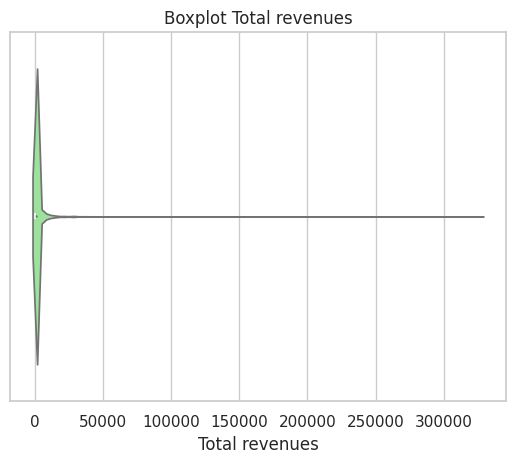

In [130]:
bx=sns.violinplot(x=df['total_revenue'],color='lightgreen')
bx.set(xlabel='Total revenues', title="Boxplot Total revenues")
#bx.set_ylim(0, 50000)
plt.show()

## Days since last purchase

In [131]:
df.loc[:,"days_since_last_purchase"].mean()

468.5871531966224

In [132]:
df["days_since_last_purchase"].quantile([0.25, 0.5, 0.75])

,days_since_last_purchase
0.25,122.0
0.50,324.0
0.75,664.0


In [133]:
df["days_since_last_purchase"].max()

4073

In [134]:
df["days_since_last_purchase"].min()

0

In [135]:
df["days_since_last_purchase"].std()

471.5043906614304

In [136]:
df['days_since_last_purchase'].value_counts()

,count
days_since_last_purchase,
115,51
117,44
118,41
122,38
114,38
...,...
1314,1
2070,1
1558,1


In [137]:
df['days_since_last_purchase'][df['days_since_last_purchase'] == 0].count()

1

In [138]:
df['days_since_last_purchase'][df['days_since_last_purchase'] == df['days_since_last_purchase'].max()].count()

1

In [139]:
df['days_since_last_purchase'][df['days_since_last_purchase'] == 1].count()

30

Checking for outliers for the column days since last purchase

In [140]:
mean = np.mean(df['days_since_last_purchase'])
std = np.std(df['days_since_last_purchase'])

threshold = 3
outliers = []
for x in df['days_since_last_purchase']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)
print("\nNumber of outliers : ", len(outliers))
print("\nPercentage of outliers : ", (len(outliers)/df.shape[0])*100)

Mean:  468.5871531966224

Standard deviation:  471.48069161436155

Outliers  :  [2275, 1998, 2971, 3044, 2063, 2234, 2136, 2379, 2354, 2279, 2251, 2123, 2278, 2111, 2015, 2376, 2403, 2455, 3310, 2004, 1941, 2528, 2866, 3595, 2216, 2355, 2461, 2587, 2314, 1992, 1887, 2232, 2797, 2305, 2877, 2112, 2105, 2025, 2743, 2337, 2002, 2139, 2218, 2132, 3260, 2185, 2053, 2490, 3537, 2193, 2109, 2201, 2133, 2724, 1891, 4017, 2080, 2195, 2372, 2584, 3938, 2066, 2186, 2310, 2442, 1927, 2310, 2080, 2849, 2202, 2080, 2968, 1926, 3822, 2070, 2106, 2169, 2435, 2396, 2688, 2138, 2289, 2495, 2680, 2528, 2057, 2806, 2388, 1971, 2318, 2067, 2117, 2178, 2021, 2438, 2027, 3120, 3126, 3889, 2310, 3066, 3517, 1893, 3276, 2441, 3107, 2207, 2631, 2755, 2200, 2462, 2080, 2305, 2340, 2221, 1948, 2190, 2065, 1901, 2268, 2516, 1913, 4073, 2595, 2041, 3486, 2403, 2187, 3013, 1948, 2242, 2524, 2101, 1969, 2767, 2557, 3031, 2291, 2212, 2433, 3825, 2375, 2185, 1963, 1940, 2721, 2893, 1885, 2926, 2023]

Number of outliers

Boxplot

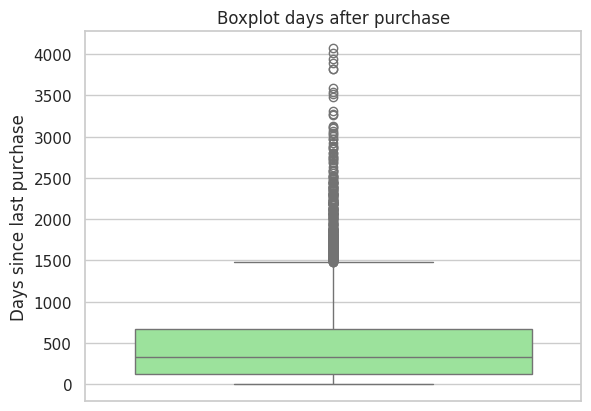

In [142]:
bx=sns.boxplot(y=df['days_since_last_purchase'],color='lightgreen')
bx.set(ylabel='Days since last purchase', title="Boxplot days after purchase")
plt.show()

<ipython-input-30-0a103c24aafb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx=sns.boxplot(x='is_newsletter_subscriber',


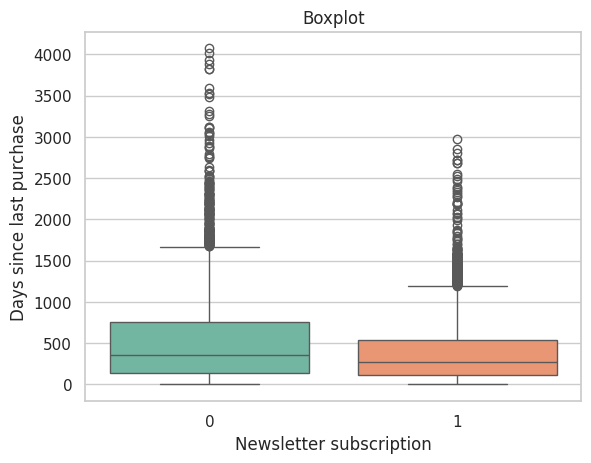

In [30]:
sns.set(style='whitegrid')
bx=sns.boxplot(x='is_newsletter_subscriber',
                y='days_since_last_purchase',
                data=df,palette="Set2")
bx.set(xlabel='Newsletter subscription', ylabel='Days since last purchase', title="Boxplot")
plt.show()

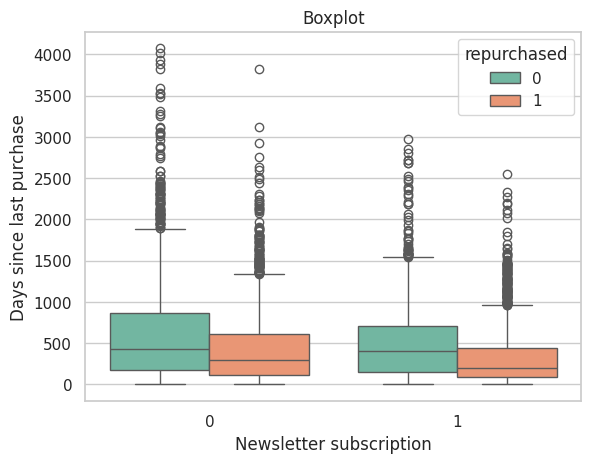

In [31]:
sns.set(style='whitegrid')
bx=sns.boxplot(x ='is_newsletter_subscriber',
             y ='days_since_last_purchase',
             hue ="repurchased",palette="Set2",
             data = df,dodge=True)
bx.set(xlabel='Newsletter subscription', ylabel='Days since last purchase', title="Boxplot")
plt.show()

# I'd like to investigate the relationship between customer spending and repurchase behavior. My hypothesis is that customers who spend more than the average are more likely to repurchase and do so more frequently.

In [32]:
average_spending = df['total_revenue'].mean()

df['top_spending'] = [1 if x > average_spending else 0 for x in df['total_revenue']]

In [33]:
df['top_spending'].value_counts()

,count
top_spending,
0,8515
1,1433


The clients that spend more than the average are just 1433

In [34]:
df['repurchased'][df['top_spending'] == 1].value_counts()

,count
repurchased,
1,1426
0,7


Rate of top spending client that repuchased

In [35]:
df['repurchased'][df['top_spending'] == 1].sum()/df.shape[0]

0.14334539605950944

And almost all of them have repurchased

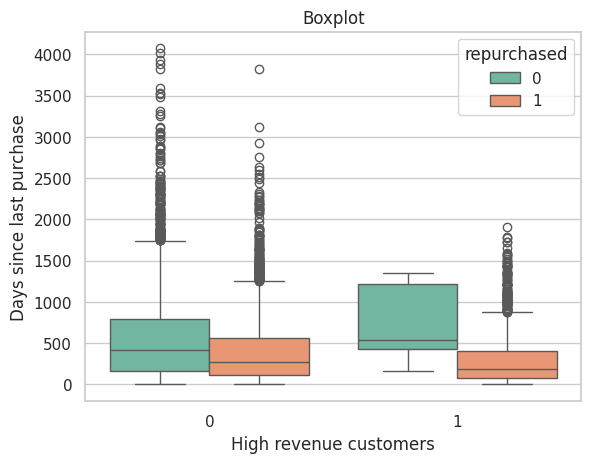

In [36]:
sns.set(style='whitegrid')
bx=sns.boxplot(x ='top_spending',
             y ='days_since_last_purchase',
             hue ="repurchased",palette="Set2",
             data = df,dodge=True)
bx.set(xlabel='High revenue customers', ylabel='Days since last purchase', title="Boxplot")
plt.show()

## How many are the customers from each country? And how from how many countries did people order?

In [37]:
df["country"].value_counts()

,count
country,
United States,6735
Germany,1101
United Kingdom,603
Switzerland,331
Canada,250
Austria,169
Japan,152
Brazil,108
France,92


From how many countries are the customer in the dataset?

In [38]:
df["country"].nunique()

24

## How many customer did repurchase? and how many did not? what is the percentage?

In [39]:
df['repurchased'].value_counts()

,count
repurchased,
0,5041
1,4907


In [40]:
(df['repurchased'].sum()/df.shape[0])*100

49.3264977885002

How many customer does have a newsletter subscription?

In [41]:
df['is_newsletter_subscriber'].value_counts()

,count
is_newsletter_subscriber,
0,5450
1,4498


In [42]:
(df['is_newsletter_subscriber'].sum()/df.shape[0])*100

45.215118616807395

How many customer that have a newsletter subscription did repurchase?

In [43]:
df['repurchased'][df['is_newsletter_subscriber'] == 1].value_counts()

,count
repurchased,
1,2555
0,1943


In [44]:
df['repurchased'][df['is_newsletter_subscriber'] == 1].sum()/df.shape[0]

0.2568355448331323

How many customer do not only purchase shoes? Do people buy more apparel or accessories with their shoes?

In [45]:
df['accessories_purchased'].value_counts()

,count
accessories_purchased,
0,9264
1,684


In [46]:
df['apparel_purchased'].value_counts()

,count
apparel_purchased,
0,9218
1,730


In [47]:
(df['accessories_purchased'].sum()/df.shape[0])*100

6.875753920386007

In [48]:
(df['apparel_purchased'].sum()/df.shape[0])*100

7.33815842380378

Just a few customer buy apparel/accessories with their shoes and apparel is ligltly more likely to be bought than accessories. (7.33% compared to 6.87%)

Quantile of quantity rma

Customer that did return something

In [50]:
df['quantity_rma'][df['quantity_rma'] > 0].count()

2904

Customers that didn't return anything

In [51]:
df.shape[0] - df['quantity_rma'][df['quantity_rma'] > 0].count()

7044

Who is the client that returned the most goods

In [52]:
df[df['quantity_rma'] == df['quantity_rma'].max()]

,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased,top_spending
uid,,,,,,,,,,,,
23992,52,1,1,1,1,0,327444,44,United Kingdom,115,1,1


Checking for outliers

In [53]:
mean = np.mean(df['quantity_rma'])
std = np.std(df['quantity_rma'])

threshold = 3
outliers = []
for x in df['quantity_rma']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)
print("\nNumber of outliers : ", len(outliers))
print("\nPercentage of outliers : ", (len(outliers)/df.shape[0])*100)

Mean:  0.651286690792119

Standard deviation:  1.8679602742251826

Outliers  :  [14, 12, 9, 8, 16, 16, 7, 8, 7, 8, 8, 25, 14, 8, 9, 9, 11, 11, 9, 10, 8, 7, 12, 8, 7, 11, 12, 9, 8, 38, 12, 8, 22, 8, 8, 10, 7, 7, 7, 44, 7, 11, 9, 15, 15, 8, 11, 11, 7, 13, 13, 7, 8, 8, 7, 11, 37, 8, 10, 17, 30, 10, 8, 24, 7, 7, 26, 26, 7, 8, 11, 8, 10, 17, 8, 13, 10, 21, 21, 7, 21, 21, 8, 11, 12, 8, 10, 15, 7, 12, 10, 10, 8, 14, 10, 23, 8, 9, 7, 8, 11, 16, 8, 9, 23, 9, 7, 16, 7, 9, 7, 12, 11, 8, 7, 8, 7, 17, 17, 9, 8, 8, 10, 16, 9, 8, 7, 7, 26, 9, 18, 19, 8, 9, 8, 8, 13, 7, 13, 13, 31, 7, 11, 12, 14, 8, 7]

Number of outliers :  147

Percentage of outliers :  1.4776839565741857


Support cases

In [55]:
df[df['number_of_customer_support_cases'] == df['number_of_customer_support_cases'].max()]

,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased,top_spending
uid,,,,,,,,,,,,
23992,52,1,1,1,1,0,327444,44,United Kingdom,115,1,1


Checking for outliers

In [56]:
mean = np.mean(df['number_of_customer_support_cases'])
std = np.std(df['number_of_customer_support_cases'])

threshold = 3
outliers = []
for x in df['number_of_customer_support_cases']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)
print("\nNumber of outliers : ", len(outliers))
print("\nPercentage of outliers : ", (len(outliers)/df.shape[0])*100)

Mean:  0.7343184559710495

Standard deviation:  1.8664929969525863

Outliers  :  [11, 7, 8, 12, 8, 14, 7, 8, 32, 7, 7, 37, 16, 16, 20, 20, 13, 9, 17, 14, 8, 12, 12, 10, 11, 20, 20, 7, 20, 8, 9, 52, 7, 7, 7, 9, 9, 16, 7, 13, 13, 11, 13, 8, 9, 9, 9, 14, 9, 9, 9, 11, 10, 31, 31, 7, 7, 7, 7, 7, 7, 17, 10, 12, 16, 9, 11, 9, 7, 8, 9, 11, 15, 7, 7, 8, 9, 9, 12, 7, 7, 9, 12, 8, 8, 17, 8, 7, 9, 12, 13, 7, 34, 8, 13, 10, 7, 10, 13, 14, 8, 7, 7, 7, 7, 7, 9, 7, 7, 14, 15, 8, 7, 9, 9, 11, 8, 8, 10, 11, 11, 9, 10, 7, 7, 7, 7, 14, 11, 8, 13, 8, 7, 9, 7, 8, 8, 10, 8, 9, 12, 11, 10, 10, 8, 9, 8, 10, 9, 7, 15, 9, 8, 9]

Number of outliers :  154

Percentage of outliers :  1.5480498592681946


How many people did not write to the support and how many did?

People that did complain/ask for something...

In [57]:
df['number_of_customer_support_cases'][df['number_of_customer_support_cases'] > 0].count()

3062

In [58]:
df.shape[0] - df['number_of_customer_support_cases'][df['number_of_customer_support_cases'] > 0].count()

6886

Did the customer that wrote to the support also retun goods?

In [59]:
df['quantity_rma'][df['number_of_customer_support_cases'] > 0].count()

3062

All the customer that did return goods did write to the customer support

Heatmap with only numerical variables

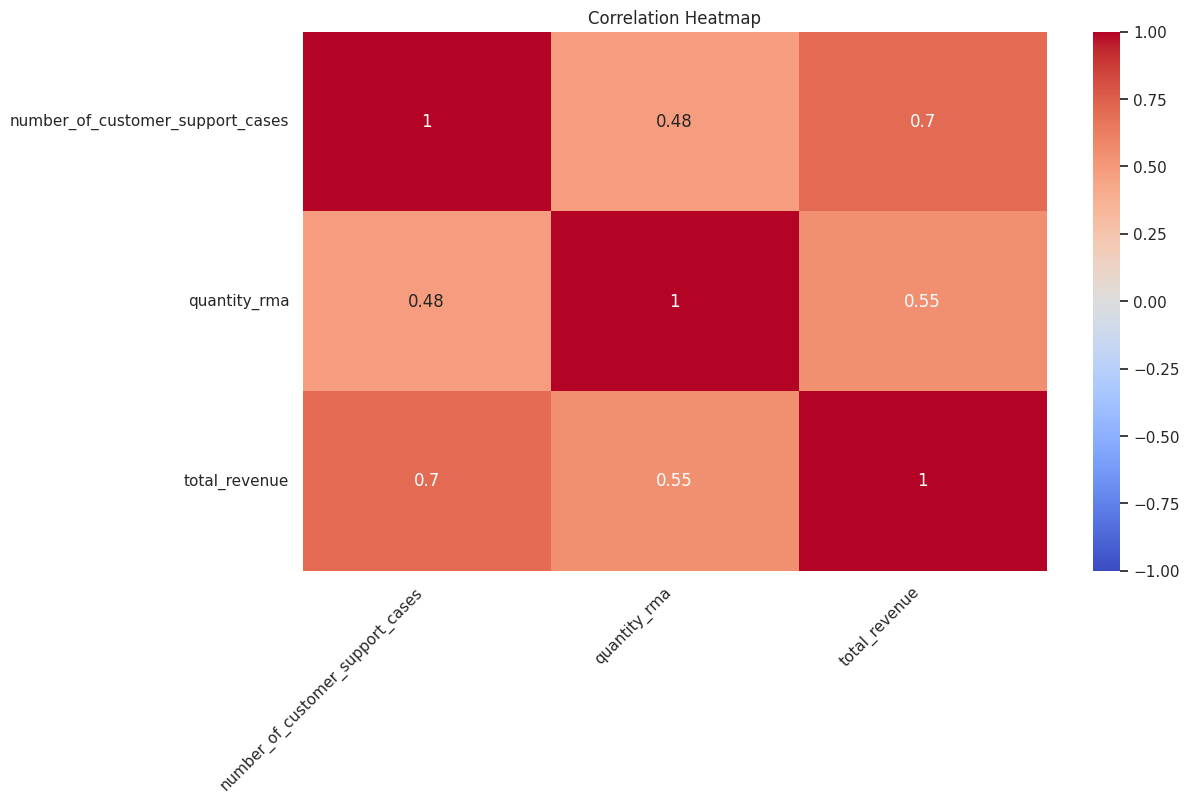

In [60]:
corr_matrix = df[['number_of_customer_support_cases', 'quantity_rma', 'total_revenue']].corr()

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

Before moving on to the analysis I would drop the rows that contains null values in the Country column

In [61]:
df_new = df.dropna(axis = 0, how ='any')

In [62]:
df.shape

(9948, 12)

In [63]:
df_new.shape

(9936, 12)

Now I want to understand where the customer are from and how much they spend in each country.

I want to try in this way, add a column of one

In [64]:
df_new['one'] = 1

<ipython-input-64-061a0cd5c528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['one'] = 1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9948 entries, 5 to 99995
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number_of_customer_support_cases  9948 non-null   int64 
 1   is_newsletter_subscriber          9948 non-null   int64 
 2   apparel_purchased                 9948 non-null   int64 
 3   accessories_purchased             9948 non-null   int64 
 4   ecom_limited_edition_purchased    9948 non-null   int64 
 5   is_subscribed_to_cyclon           9948 non-null   int64 
 6   total_revenue                     9948 non-null   int64 
 7   quantity_rma                      9948 non-null   int64 
 8   country                           9936 non-null   object
 9   days_since_last_purchase          9948 non-null   int64 
 10  repurchased                       9948 non-null   int64 
 11  top_spending                      9948 non-null   int64 
dtypes: int64(11), object(1)


Smaller dataframe with just the variables I need

In [66]:
df_small=df_new[['country','total_revenue','one','number_of_customer_support_cases','repurchased','apparel_purchased','accessories_purchased','quantity_rma']]

In [67]:
grouped = df_small.groupby('country').sum()

In [68]:
grouped = df_small.groupby('country').sum().reset_index()
print(grouped)

              country  total_revenue   one  number_of_customer_support_cases  \
0           Australia          76153    90                                77   
1             Austria         102618   169                               109   
2                BeNe          34496    54                                37   
3              Brazil          80971   108                                87   
4              Canada         447232   250                               302   
5               China           5771    22                                 0   
6             Denmark           9077     9                                15   
7   Distributors APAC          16489    30                                19   
8     Distributors EU         154212    31                                63   
9    Distributors ROW            669     4                                 0   
10             France          51953    92                                54   
11            Germany        1602544  11

In [69]:
grouped=grouped.sort_values('total_revenue',ascending=False)

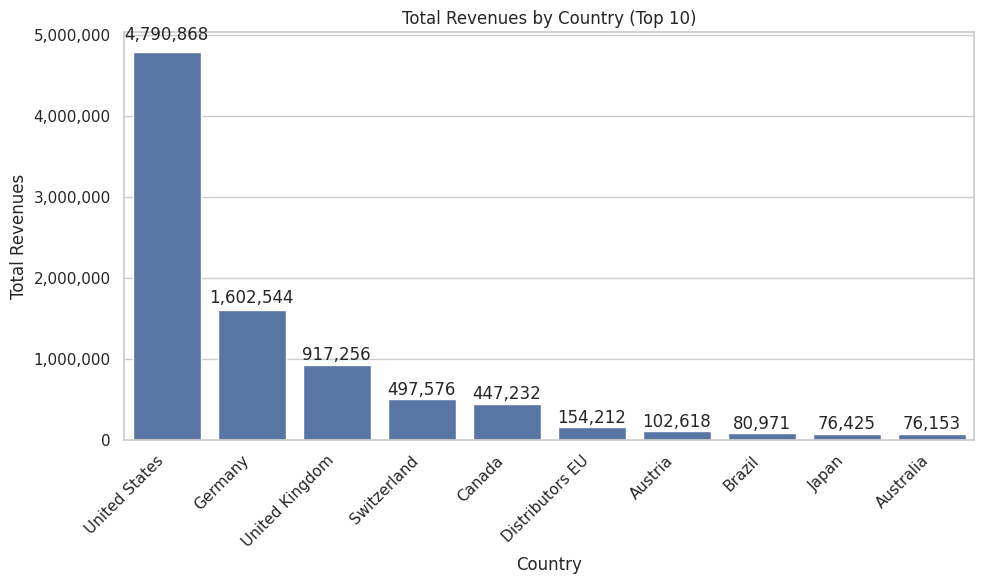

In [70]:
# Limit to the top 10 countries
top_10_countries = grouped.nlargest(10, 'total_revenue')

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='total_revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis for readable numbers (e.g., in millions)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the total revenue value on top of the bars
for p in barplot.patches:
    height = p.get_height()  # Get the height of the bar
    barplot.text(p.get_x() + p.get_width() / 2., height + (0.02 * height),
                 f'{height:,.0f}', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total Revenues')
plt.title('Total Revenues by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()


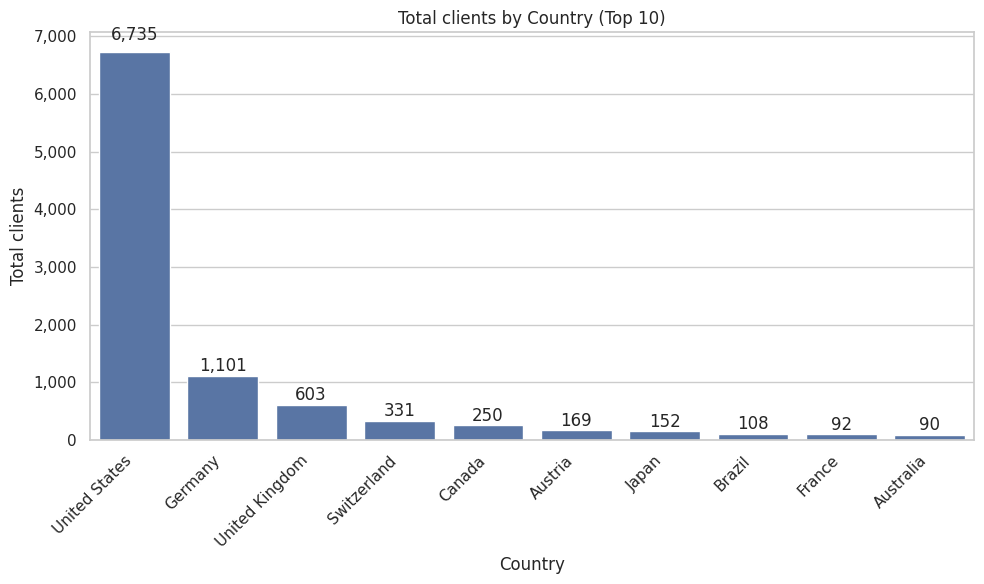

In [71]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.ticker as mticker

# Limit to the top 10 countries
top_10_countries = grouped.nlargest(10, 'one')

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='one')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis for readable numbers (e.g., in millions)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the total revenue value on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + (0.02 * height),
                 f'{height:,.0f}', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total clients')
plt.title('Total number of clients by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()

Showing the plot by percentages for each client and the bar change colour for each country

<ipython-input-72-17f80a480d31>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_countries, x='country', y='percentage', palette='viridis')


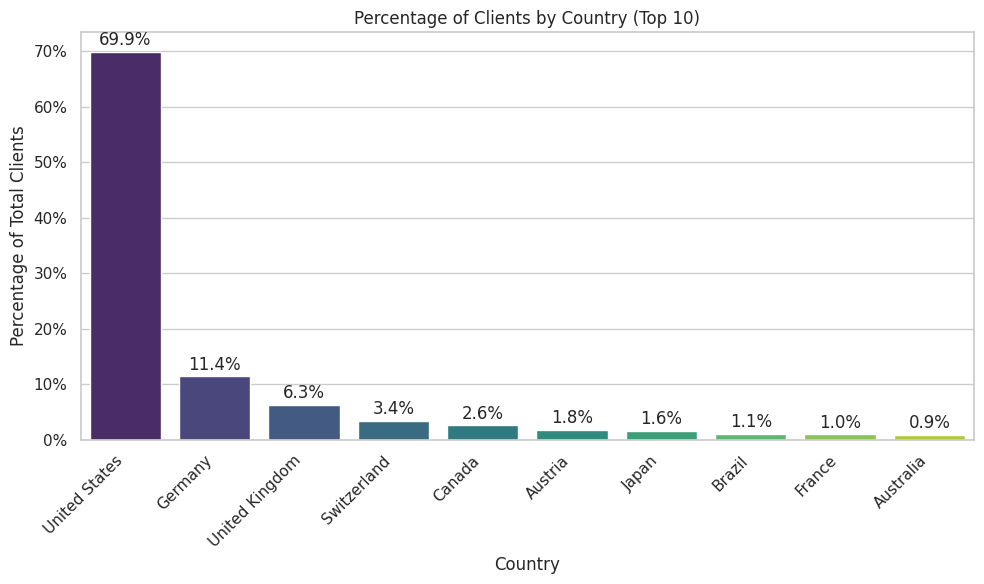

In [72]:
top_10_countries = grouped.nlargest(10, 'one')

# Calculate the total number of clients in the top 10 countries
total_clients_top_10 = top_10_countries['one'].sum()

# Calculate the percentage of clients for each country
top_10_countries['percentage'] = (top_10_countries['one'] / total_clients_top_10) * 100

# Create the barplot with a different color for each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='percentage', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis as percentages
plt.gca().get_yaxis().set_major_formatter(mticker.PercentFormatter())

# Add the percentage value on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.5,
                 f'{height:.1f}%', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Percentage of Total Clients')
plt.title('Percentage of Clients by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()

In [73]:
grouped['revenue_for_client'] = grouped['total_revenue']/grouped['one']

In [74]:
grouped['revenue_for_client'].max()

4974.580645161291

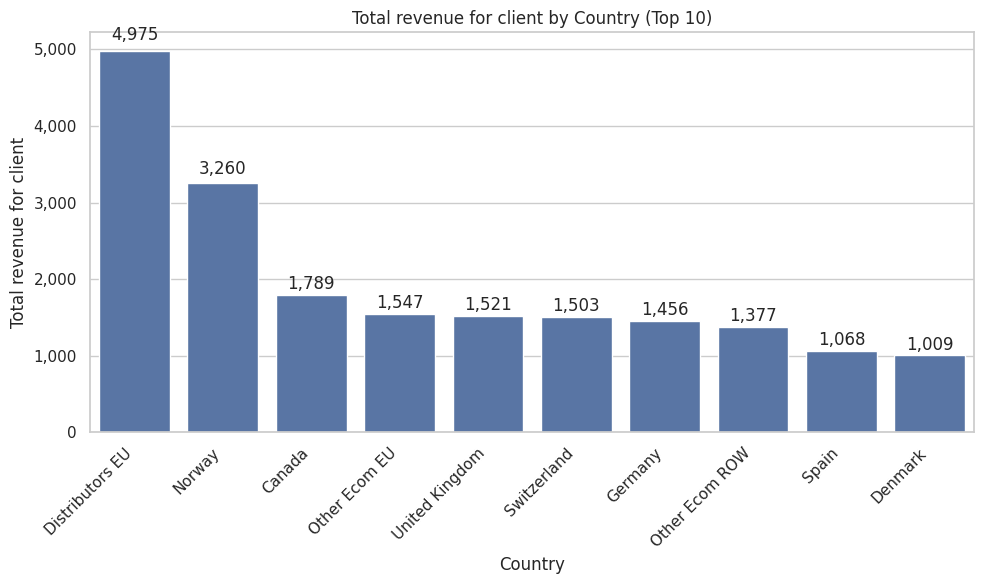

In [75]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.ticker as mticker

# Limit to the top 10 countries
top_10_countries = grouped.nlargest(10, 'revenue_for_client')

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='revenue_for_client')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis for readable numbers (e.g., in millions)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the total revenue value on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + (0.02 * height),
                 f'{height:,.0f}', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total revenue for client')
plt.title('Total revenue for client by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()

How many customer did repurchase for each country?

<ipython-input-76-44e26027d9f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_countries, x='country', y='repurchased',palette='viridis')


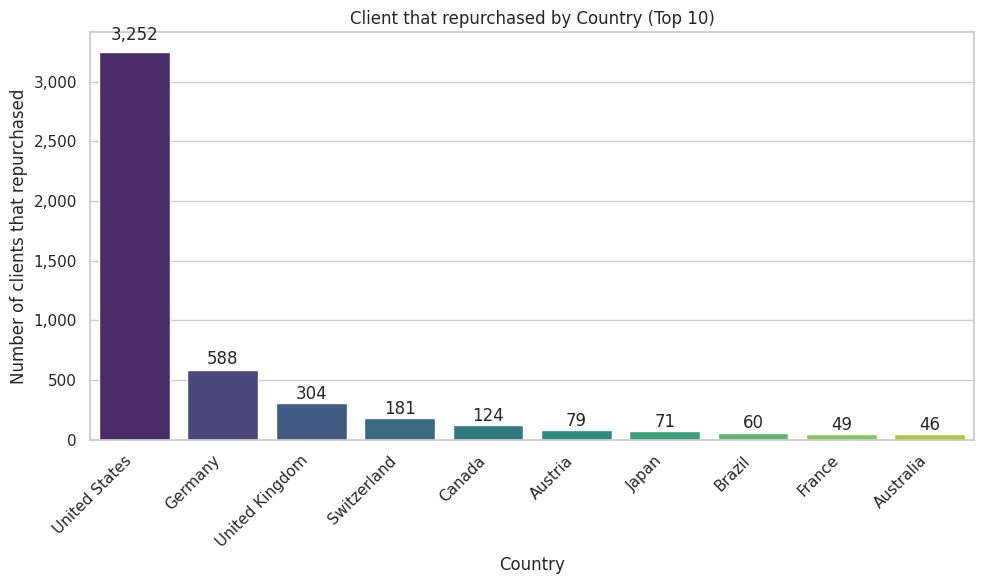

In [76]:
# Limit to the top 10 countries
top_10_countries = grouped.nlargest(10, 'repurchased')

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='repurchased',palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis for readable numbers (e.g., in millions)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the total revenue value on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + (0.02 * height),
                 f'{height:,.0f}', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Number of clients that repurchased')
plt.title('Client that repurchased by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()

Which is the country where customer buy apparel the most?

<ipython-input-78-a0fbb048a760>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_countries, x='country', y='apparel_purchased',palette='viridis')


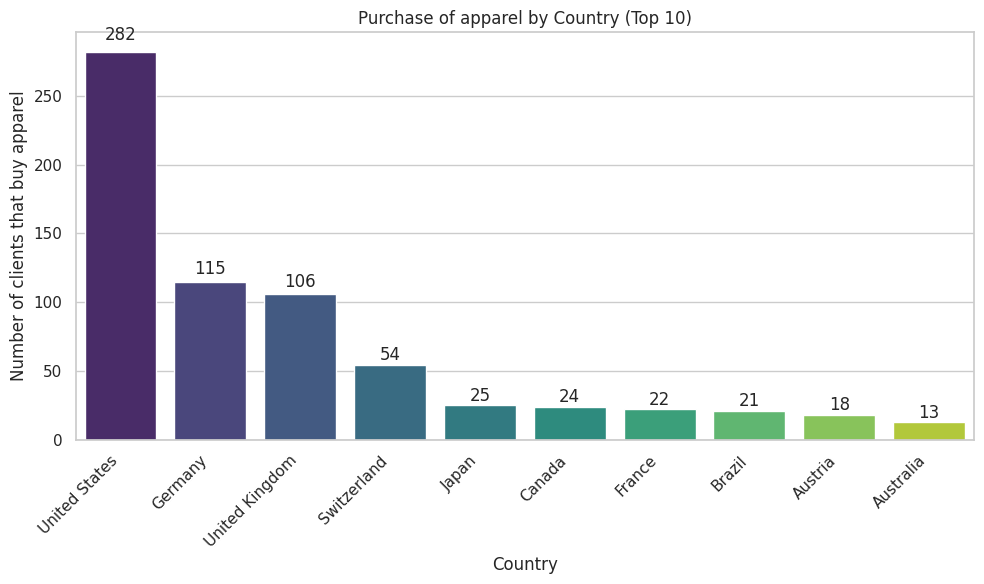

In [78]:
# Limit to the top 10 countries
top_10_countries = grouped.nlargest(10, 'apparel_purchased')

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_countries, x='country', y='apparel_purchased',palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Format y-axis for readable numbers (e.g., in millions)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the total revenue value on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + (0.02 * height),
                 f'{height:,.0f}', ha="center", va='bottom')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Number of clients that buy apparel')
plt.title('Purchase of apparel by Country (Top 10)')

# Show plot
plt.tight_layout()
plt.show()

## Check if the response variable is balanced

In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 5 to 99995
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number_of_customer_support_cases  9936 non-null   int64 
 1   is_newsletter_subscriber          9936 non-null   int64 
 2   apparel_purchased                 9936 non-null   int64 
 3   accessories_purchased             9936 non-null   int64 
 4   ecom_limited_edition_purchased    9936 non-null   int64 
 5   is_subscribed_to_cyclon           9936 non-null   int64 
 6   total_revenue                     9936 non-null   int64 
 7   quantity_rma                      9936 non-null   int64 
 8   country                           9936 non-null   object
 9   days_since_last_purchase          9936 non-null   int64 
 10  repurchased                       9936 non-null   int64 
 11  top_spending                      9936 non-null   int64 
 12  one                     

In [80]:
df_new=df_new.drop(['top_spending','one'],axis=1)

In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 5 to 99995
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number_of_customer_support_cases  9936 non-null   int64 
 1   is_newsletter_subscriber          9936 non-null   int64 
 2   apparel_purchased                 9936 non-null   int64 
 3   accessories_purchased             9936 non-null   int64 
 4   ecom_limited_edition_purchased    9936 non-null   int64 
 5   is_subscribed_to_cyclon           9936 non-null   int64 
 6   total_revenue                     9936 non-null   int64 
 7   quantity_rma                      9936 non-null   int64 
 8   country                           9936 non-null   object
 9   days_since_last_purchase          9936 non-null   int64 
 10  repurchased                       9936 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 931.5+ KB


In [82]:
df_new['repurchased'].value_counts()

,count
repurchased,
0,5031
1,4905


I would say that the response variable is balanced

I want to try two methods, one that uses the country as dummy and the other one that doesn't use it

In [83]:
df_country=df_new.copy()

In [84]:
df_new['country']

,country
uid,
5,United States
16,United States
37,Australia
55,Japan
80,United States
...,...
99976,Other Ecom EU
99977,United States
99987,United Kingdom


You need to encode the country as dummy variable first

In [85]:
# Load the data
y = df_new['repurchased']  # Target variable (0 or 1)

#Country has to be encoded
country_tmp = pd.get_dummies(df_new['country']).astype(int)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.9441649899396378
ROC-AUC Score: 0.9440192114013289
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       985
           1       0.93      0.96      0.95      1003

    accuracy                           0.94      1988
   macro avg       0.94      0.94      0.94      1988
weighted avg       0.94      0.94      0.94      1988



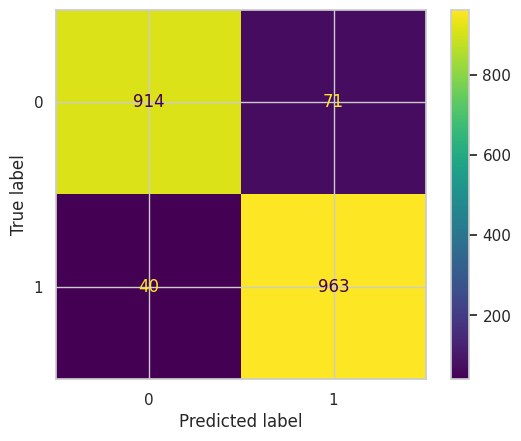

In [86]:
df_new = df_new.drop('country',axis=1)
df_new = pd.concat([df_new,country_tmp],axis=1)

X = df_new.drop(columns=['repurchased'])  # Features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier()

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_model = random_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  random_search.best_params_)

# Predict on test data
y_pred = best_rf_model.predict(X_test)

##Confusion matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))



Feature importance

<Axes: >

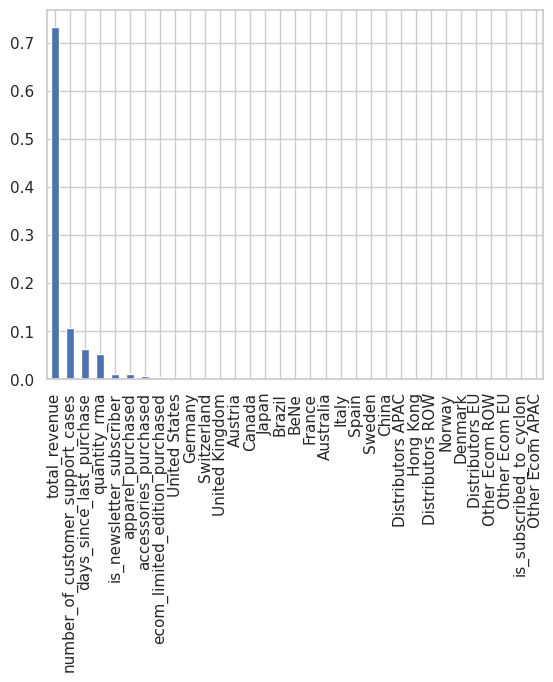

In [94]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [95]:
# Predict class probabilities for the test set
# the columns represent the probabilities for class 0 and class 1.
probs = best_rf_model.predict_proba(X_test)
probs

array([[0.00200688, 0.99799312],
       [0.99198946, 0.00801054],
       [0.98488868, 0.01511132],
       ...,
       [0.23027355, 0.76972645],
       [0.01080087, 0.98919913],
       [0.03368567, 0.96631433]])

In [97]:
print(probs[:5])  # Print probabilities for the first 5 observations

# probability of class 1 (response = 1)
probs_class_1 = probs[:, 1]  # Column 1 contains probabilities for class 1

probs_class_1


[[2.00687820e-03 9.97993122e-01]
 [9.91989457e-01 8.01054285e-03]
 [9.84888675e-01 1.51113248e-02]
 [4.19003347e-04 9.99580997e-01]
 [1.78801754e-01 8.21198246e-01]]


array([0.99799312, 0.00801054, 0.01511132, ..., 0.76972645, 0.98919913,
       0.96631433])

Now I want to use the same model but by dropping the country column

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.9456740442655935
ROC-AUC Score: 0.9454691762276621
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       985
           1       0.93      0.97      0.95      1003

    accuracy                           0.95      1988
   macro avg       0.95      0.95      0.95      1988
weighted avg       0.95      0.95      0.95      1988



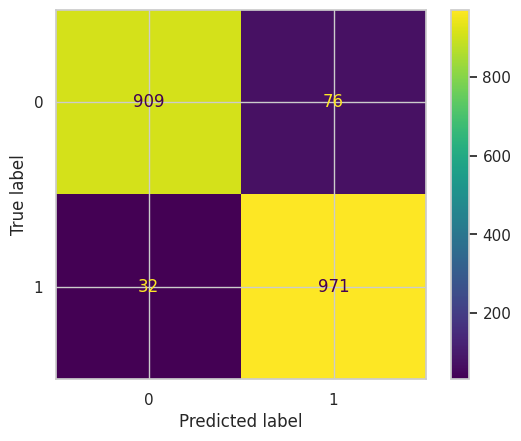

In [98]:
# Load the data
y = df_country['repurchased']  # Target variable (0 or 1)

df_country = df_country.drop('country',axis=1)

X = df_country.drop(columns=['repurchased'])  # Features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier()

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_model = random_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  random_search.best_params_)

# Predict on test data
y_pred = best_rf_model.predict(X_test)

##Confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

<Axes: >

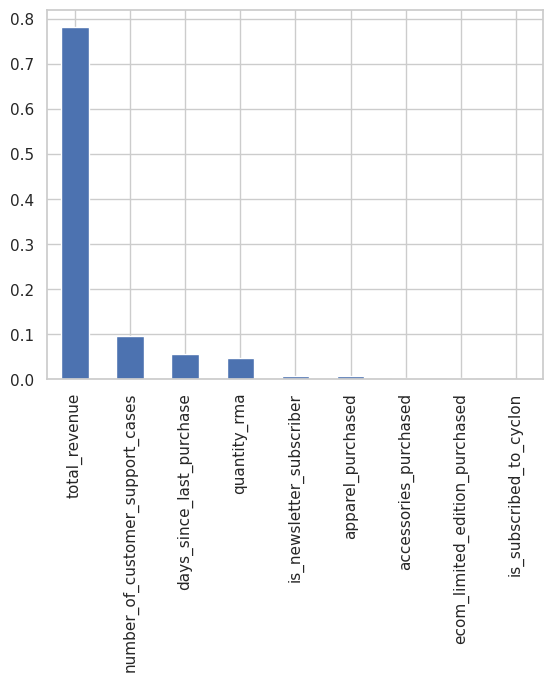

In [99]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [104]:
probs = best_rf_model.predict_proba(X_test)

In [106]:
rounded_probs = np.round(probs, decimals=2)

In [107]:
rounded_probs

array([[0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.02, 0.98]])